# Obtaining a sample data set

To create a sample file the instruction was given in the project details.  As we see the data is so big to investigate 
, so we create a sample with the below code. This sample code was obtained by taking only the 10th top level element in the xml tree.


## https://classroom.udacity.com/nanodegrees/nd002/parts/860b269a-d0b0-4f0c-8f3d-ab08865d43bf/modules/316820862075463/lessons/3168208620239847/concepts/77135319070923

In [184]:

##It is used to create the Sample file for our selected area i.e Boulder-Coloradoimport xml.etree.cElementTree as ET

def get_element(osm_file, tags=('node', 'way', 'relation')):
    """Yield element if it is the right type of tag"""

    context = ET.iterparse(osm_file, events=('start', 'end'))
    _, root = next(context)
    for event, elem in context:
        if event == 'end' and elem.tag in tags:
            yield elem
            root.clear()
            
OSM_FILE = "denver-boulder_colorado.osm"
SAMPLE_FILE = "sample44.osm"
k = 10

with open(SAMPLE_FILE, 'wb') as output:
    output.write('<?xml version="1.0" encoding="UTF-8"?>\n')
    output.write('<osm>\n  ')

    # Write every kth top level element
    for i, element in enumerate(get_element(OSM_FILE)):
        if i % k == 0:
            output.write(ET.tostring(element, encoding='utf-8'))

    output.write('</osm>')
    


# Data Exploration:

In [398]:
##the function count_tags we have explored the different tags in the .OSM file.

import xml.etree.cElementTree as ET
from collections import defaultdict
import pprint

def count_tags(filename):
    tag_counts = defaultdict(int)
    for event, elem in ET.iterparse(filename):
        tag_counts[elem.tag] += 1
    return tag_counts

tags = count_tags(OSM_FILE)

pprint.pprint(dict(tags))


{'bounds': 1,
 'member': 42049,
 'nd': 5430032,
 'node': 4773582,
 'osm': 1,
 'relation': 2463,
 'tag': 2419814,
 'way': 528471}


While looking at the whole XML file we can see that it has different types of tags exits in it. So inorder to find the number of unique tags we need to do parse using  ElementTree and count number of unique tags.


With the function 'key_type', such that we have a count of each of
four tag categories in a dictionary:

  "lower", for tags that contain only lowercase letters and are valid,
  
  "lower_colon", for otherwise valid tags with a colon in their names,
  
  "problemchars", for tags with problematic characters, and
  
  "other", for other tags that do not fall into the other three categories.

In [399]:
##the function 'key_type', such that we have a count of each of four tag categories in a dictionary
import re

lower = re.compile(r'^([a-z]|_)*$')
lower_colon = re.compile(r'^([a-z]|_)*:([a-z]|_)*$')
problemchars = re.compile(r'[=\+/&<>;\'"\?%#$@\,\. \t\r\n]')

def key_type(element, keys):
    if element.tag == 'tag':
        try:
            lower.search(element.attrib['k']).group()
            keys["lower"] += 1
        except AttributeError:
            try:
                lower_colon.search(element.attrib['k']).group()
                keys["lower_colon"] += 1
            except AttributeError:
                try:
                    problemchars.search(element.attrib['k']).group()
                    keys["problemchars"] += 1
                except AttributeError:
                    keys["other"] += 1
    return keys

In [400]:
def process_map_tagtypes(filename):
    keys = {"lower": 0, "lower_colon": 0, "problemchars": 0, "other":0}
    for _, element in ET.iterparse(filename):
        keys = key_type(element, keys)
    return keys

keys = process_map_tagtypes(OSM_FILE)

pprint.pprint(keys)

{'lower': 1623239, 'lower_colon': 754172, 'other': 42400, 'problemchars': 3}


# Exploration of Users

This gives information that how many users have contributed to the denver-boulder_colorado osm file.

In [401]:
##below code is to explore the number that how many users have contributed to the denver-boulder_colorado.OSM file
def get_user(element):
    return

def process_map_users(filename):
    users = set()
    for _, element in ET.iterparse(filename):
        for key in element.attrib:
            if key == 'uid':
                users.add(element.attrib[key])
    return users

users = process_map_users(OSM_FILE)

len(users)

2399

# Auditing and Updating Street Names

With the variable 'mapping', we are auditing the osm file and extracting the unexpected street names and will be fixing them with the appropriate one in the expected list.

The following regex was used to look for street names.

In [402]:
##with this we have are Auditing the different kinds of street names in the .OSM file.

street_type_re = re.compile(r'\b\S+\.?$', re.IGNORECASE)

expected = ["Street", "Avenue", "Boulevard", "Drive", "Court", "Place", "Square", "Lane", "Road", 
            "Trail", "Parkway", "Commons", "Cove", "Highway", "Lane"]

audit_street_type function searches for the street name using the regex and adding the name to a set.


In [403]:
def audit_street_type(street_types, street_name):
    m = street_type_re.search(street_name)
    if m:
        street_type = m.group()
        if street_type not in expected:
            street_types[street_type].add(street_name)
            
def is_street_name(elem):
    return (elem.attrib['k'] == "addr:street")

def audit(osmfile):
    osm_file = open(osmfile, "r")
    street_types = defaultdict(set)
    for event, elem in ET.iterparse(osm_file, events=("start",)):
        if elem.tag == "node" or elem.tag == "way":
            for tag in elem.iter("tag"):
                if is_street_name(tag):
                    audit_street_type(street_types, tag.attrib['v'])
    osm_file.close()
    return street_types



Auditing the osm file:

In [404]:
st_types = audit(OSM_FILE)



st_types shows the streets that need to be fixed which are printed below.


In [405]:
st_types

defaultdict(set,
            {'100': {'15th Street Suite 100',
              'South Ridgeline Blvd, Suite 100',
              'Wadsworth Parkway #100'},
             '103': {'15th Street #103'},
             '106': {'Landmark Way, Suite 106'},
             '107': {'Dorchester St #107'},
             '110': {'E. Mineral Avenue, Suite 110'},
             '119': {'Highway 119', 'State Highway 119'},
             '120': {'West 120th Avenue, Ste 120'},
             '126': {'County Rd 126'},
             '13': {'County road 13'},
             '154': {'West 136th Avenue Unit 154'},
             '1606': {'1606'},
             '169': {'S Broadway #169'},
             '186': {'County Road 186'},
             '19': {'South Rock Creek Parkway, Building 19'},
             '2': {'Colorado SH 2',
              'Colorado SR 2',
              'SR 2',
              'State Highway 2'},
             '201': {'Ken Pratt Boulevard #201'},
             '220': {'South Colorado Boulevard, #220'},
             '

By looking at the above output, some thing in the output need to be fixed. An example of a case where everythinh needs to be consistent is Avenue, which is reffered to by any of the following values in the data:
"Ave", "AVE", "Ave."

To deal with different kinds of mapping_streets, the mapping dictionary below was created. The keys are the items to be fixed, and the values are what the keys should be after fixing

In [406]:
##below code is used for mapping the correcting incorrected street names
mapping_street = { "St": "Street",
            "St1.": "Street",
            "st": "Street",
            "street": "Street",
            "Street,": "Street",
            "Ave": "Avenue",
            "Ave.": "Avenue",
            "Avene": "Avenue",
            "Blvd": "Boulevard",
            "Blvd.": "Boulevard",
            "Boulevard,": "Boulevard",
            "Blvd,": "Boulevard",
            "Blvd.,": "Boulevard",
            "boulder" : "Boulder",
            "Dr": "Drive",
            "Dr.": "Drive",
            "denver":"Denver",
            "Ct": "Court",
            "Ct.": "Court",
            "court": "Court",
            "CO" : "Colorado",
            "Cv": "Cove",
            "cove": "Cove",
            "Cc": "Cove",
            "Cir": "Circle",
            "Pl": "Place",
            "Pl.": "Place",
            "lane": "Lane",
            "Ln": "Lane",
            "Rd": "Road", 
            "Rd.": "Road",
            "R": "Road",
            "Trl": "Trail",
            "Tr": "Trail",
            "Pkwy": "Parkway",
            "Hwy": "Highway",
            "HWY": "Highway",
            "Hwy,": "Highway",
            "H": "Highway",
            "I35": "Interstate Highway 35",
            "IH35": "Interstate Highway 35",
            "IH35,": "Interstate Highway 35",
            "IH-35": "Interstate Highway 35",
            "I-35": "Interstate Highway 35",
            "IH": "Interstate Highway",
            "I": "Interstate",
            "35,": "35",
            "main": "Main",
            "N": "North",
            "N.": "North",
            "Ovlk": "Overlook",
            "pass": "Pass",
            "Ps": "Pass",
            "W": "West",
            "W.": "West",
            "E": "East",
            "E.": "East",
    
            "F.M.": "Farm-to-Market Road",
            "U.S.": "United States",
            "US": "United States",
            "RM": "Ranch-to-Market Road",
            "RM1431": "Ranch-to-Market Road 1431",
            "RR": "Ranch Road",
            "S ": "South",
            "S.": "South",
            "SH":"State Highway",
            "south": "South",
            "Bldg": "Building",
            "Bldg.": "Building",
            "Bld": "Building",
            "Ste": "Suite",
            "Ste,": "Suite",
            "STE": "Suite",
            "Ste.": "Suite",
            "suite": "Suite",
            "C": "Country",
            "church": "Church",
            "brigadoon": "Brigadoon",
            "Drive/Rd": "Drive/Road",
            "Mo-Pac": "MoPac", 
            "Avenue,Ste": "Avenue Suite",
            "suite#L131": "Suite L131"}

#
Updates the name based on mapping dictionary and also fixes other items, such as St., N, C, I , H:

In [407]:
##with this block we are Updating the street names in the .osm file.
def update_name(mapping1, name, mapping2):
    parts = name.split()
    newparts = []
    for item in parts:
        if item == "St" and "Rue" in parts:
            newparts.append("Saint")
        elif item =="N" in parts:
            newparts.append("North")
        elif item =="S" in parts:
            newparts.append("South")
        elif item =="E" in parts:
            newparts.append("East")
        elif item =="W" in parts:
            newparts.append("West")            
        elif item =="H" in parts:
            newparts.append("Highway")
        elif item =="I" in parts:
            newparts.append("Interstate")            
        else:
            if item in mapping.keys():
                newparts.append(mapping[item])
            else:
                newparts.append(item)
    name = ' '.join(newparts)
    name = append_highway(name)
    name = update_farm_ranch_to_market(name)
    return name

In [408]:
for st_type, ways in st_types.iteritems():
    for name in ways:
        for each in name.split():
            if each in mapping.keys():
                better_name = update_name(mapping ,name, mapping)
                print name, "=>", better_name

South Parker Rd => South Parker Road
Tower Rd => Tower Road
Elk Creek Rd => Elk Creek Road
North Watkins Rd => North Watkins Road
S Mt Vernon Country Club Rd => South Mt Vernon Country Club Road
Mt. Vernon Rd => Mt. Vernon Road
Lagae Rd => Lagae Road
E Arapahoe Rd => East Arapahoe Road
East Arapahoe Rd => East Arapahoe Road
S. River Rd => S. River Road
E. Rim Rd => E. Rim Road
E County Line Rd => East County Line Road
E Araphahoe Rd => East Araphahoe Road
Lookout Mountain Rd => Lookout Mountain Road
S Parker Rd => South Parker Road
E Arapaphoe Rd => East Arapaphoe Road
West Ridge Rd => West Ridge Road
S. Golden Rd => S. Golden Road
Saint Moritz Rd => Saint Moritz Road
Depot Hill Rd => Depot Hill Road
Coalton Rd => Coalton Road
Pine Valley Rd => Pine Valley Road
Wood Rock Rd => Wood Rock Road
S Golden Rd => South Golden Road
E Araphoe Rd => East Araphoe Road
E Orchard Rd Bike Lane WB => East Orchard Road Bike Lane WB
US Hwy 285 => US Highway 285
E Flatiron Cir => East Flatiron Circle
S 

# Other parameters to look at (other values of k under tag)

In [409]:
k = set()
for event, element in ET.iterparse(SAMPLE_FILE):
    if element.tag == "tag" or element.tag == "way":
        for tag in element.iter("tag"):
             k.add(tag.attrib['k'])

In [410]:
len(k)

668

In [411]:
k

{'4wd_only',
 'CCFD-ID',
 'CDOT_route',
 'CITY_BUILD',
 'CODT_route',
 'FIXME',
 'FIXME:bicycle',
 'Intensity',
 'NHD:ComID',
 'NHD:Elevation',
 'NHD:FCode',
 'NHD:FDate',
 'NHD:FTYPE',
 'NHD:FType',
 'NHD:GNIS_ID',
 'NHD:GNIS_Name',
 'NHD:RESOLUTION',
 'NHD:ReachCode',
 'NHD:way_id',
 'NHS',
 'SK53_bulk:load',
 'Shape_Area',
 'Shape_Leng',
 'TYPE',
 'abandoned',
 'abandoned:highway',
 'access',
 'access:conditional',
 'access:lanes',
 'acess',
 'addr:city',
 'addr:country',
 'addr:county',
 'addr:door',
 'addr:flats',
 'addr:floor',
 'addr:full',
 'addr:housename',
 'addr:housenumber',
 'addr:postbox',
 'addr:postcode',
 'addr:state',
 'addr:street',
 'addr:suite',
 'addr:unit',
 'address',
 'admin_level',
 'advertising',
 'aerialway',
 'aerodrome',
 'aerodrome:type',
 'aeroway',
 'alt_name',
 'alt_phone',
 'alt_website',
 'amenity',
 'amenity_1',
 'animal_shelter',
 'area',
 'artist_name',
 'artwork_type',
 'atm',
 'attraction',
 'attribution',
 'automated',
 'backcountry',
 'backres

In the above output we can observe that they are lot of parameters to see if the data are consistent, In this project we are mainly concentrating on street names, phone number, postcode and city names we are exploring.



# Auditing and updating Phone Numbers

Below is the method for auditing street names, to do that is_phone function is created. 


In [412]:
##In this we have audited the different kinds of Phone numbers and its different kinds of formats in the .osm file
def is_phone(element):
    return (element.attrib['k'] == "phone" or element.attrib['k'] == "contact:phone")

Below is the regular expression for the phone numbers

In [413]:
phone_re = re.compile(r'^\d\d\d\-\d\d\d\-\d\d\d\d$')

In the below function we are printing out the phone numbers listed in the sample file. Based on the sample file we will be updating the actual file .

In [414]:
for event, element in ET.iterparse(SAMPLE_FILE):
    if element.tag == "node" or element.tag == "way":
        for tag in element.iter("tag"):
            if is_phone(tag):
                if phone_re.search(tag.attrib['v']) == None:
                    print tag.attrib['v']

+1 303 320 5871
3037337448
3036239600
+1-303-979-2064
+1 303 4998225
(303) 721-6655
3036155818
3037774665
+1-303-442-8022
567-4085
+1 303 4407223
+1 303 4940177
(303) 442-0589
3034401948
3038253232
+1 303 296 2273
+1-303-838-4375
(303) 935-8966
(303) 741-4469
(720) 890-9500
(303) 442-8850
+1-303-427-4882
(720) 266-6160
+1 720 9328787
(720) 277-3788
+1 303 4992200
+1 720 2741101
(303) 447-2828
(303) 499-9288
+1-303-487-1412
+1-303-582-3707
+1-303-582-3707
(303) 993-2094
303.499.9107
+1-303-232-3295
+01 303 8053880
(303) 232-1100
+1 303 286 1475
(303) 691-1515
303 447 0167
(303)444-3092
(303) 755-1995
303.477.3312
+1 800-935-9935
3035473270
+1 303 443 8600
(303) 295-7837
(303) 671-2598
+1-303-736-6999
+1 303-745-7373
+01 303 660 0774
+1 720-213-6904
+1 303 422 8463
+1 303-442-4130
+1 (303) 342-7275
+1-303-443-9122
+1-303-833-7330
+1 303 5451745
+1 303 5580671
+1 303 757 3333
+1 303 3412500
+1-303-582-9251
+1 303 449-5811
(303) 438-6600
(720) 583-6733
(303) 833-6878
(303) 544-0036
(720) 2

With the below function we will be cleaning up the phone numbers.


In [417]:
##with the update_ph_num function we have updated the phone numbers in the .OSM file.

def update_ph_num(number):
    phone_re = re.compile(r'^\d\d\d\-\d\d\d\-\d\d\d\d$')
    if phone_re.search(number) == None:
        phno = []
        number = list(number.lstrip("+1"))
        for char in number:
            try:
                if int(char) in [x for x in range(10)]:
                    if len(phno) == 10:
                        continue
                    phno.append(char)
            except ValueError:
                continue
        number = "".join(phno)
        number = number[:3] + "-" + number[3:6] + "-" + number[6:]
                    
    return number

In [418]:
update_ph_num("+1-632-679-0244;+1-855-444-8301")

'632-679-0244'

# Auditing Postal Code

The below function is for returning postcode values:

In [419]:
##we have audited the postal codes in the .OSM file
def is_postcode(element):
    return (element.attrib['k'] == "addr:postcode" or element.attrib['k'] == "postal_code")

The regular expression for the postal code is below:

In [420]:
postcode_re = re.compile(r'^8\d\d\d\d$')

With the below get_element function we will be used to explore the postcode. To do that we use a counter in the get_element function.


In [421]:
counter = 0
for element in get_element(OSM_FILE):
    if counter == 25:
        break
    if element.tag == "node" or element.tag == "way":
        for tag in element.iter("tag"):
            if is_postcode(tag):
                if postcode_re.search(tag.attrib['v']) == None:
                    print tag.attrib['v']
                    counter += 1


80127-5008
6210
80444-2000
80226-2975
80214-1803
80214-1837
80214-1803
80214-1801
80214-1803
80214-1825
80214-1803
80214-1838
80214-1801
80214-1805
80214-1803
80214-1801
80214-1803
80214-1833
80214-1803
80214-1807
80214-1801
CO80219
CO 80401
Highlands Ranch,
CO


With the below function we wil be update the postcode.


In [422]:
#we have updating the postal codes using update_post_code function.
def update_post_code(postcode):
    try:
        postcode = re.compile(r'8\d\d\d\d').search(postcode).group()
    except AttributeError:
        postcode = 'None'
    return postcode

In [423]:
##In this we are viewing the formated postal code according to the regular expression
for element in get_element(OSM_FILE):
    if element.tag == "node" or element.tag == "way":
        for tag in element.iter("tag"):
            if is_postcode(tag):
                if postcode_re.search(tag.attrib['v']) == None:
                    print tag.attrib['v'], "=>", update_postcode(tag.attrib['v'])

80127-5008 => 80127
6210 => None
80444-2000 => 80444
80226-2975 => 80226
80214-1803 => 80214
80214-1837 => 80214
80214-1803 => 80214
80214-1801 => 80214
80214-1803 => 80214
80214-1825 => 80214
80214-1803 => 80214
80214-1838 => 80214
80214-1801 => 80214
80214-1805 => 80214
80214-1803 => 80214
80214-1801 => 80214
80214-1803 => 80214
80214-1833 => 80214
80214-1803 => 80214
80214-1807 => 80214
80214-1801 => 80214
CO80219 => 80219
CO 80401 => 80401
Highlands Ranch, => None
CO => None
CO 80439 => 80439
80210-2938 => 80210
80210-2938 => 80210
80012-4014 => 80012
CO 80247 => 80247
80214-1833 => 80214
80214-1801 => 80214
80214-1801 => 80214
90222 => None
80124-5644 => 80124
8129 => None
Seventh Street => None
80234-4154 => 80234
801112 => 80111
80229-7923 => 80229
80234-4201 => 80234
8051 E Quincy Ave. => None
80113-1525 => 80113
80113-1523 => 80113
80503-7570 => 80503
80503-7570 => 80503
80503-7570 => 80503
80503-7570 => 80503
80503-7570 => 80503
80503-7570 => 80503
80210-2938 => 80210
80305-9

# Auditing the city 

To audit the city we need to create a list of expected cities.


In [424]:
##In this we have Audited the different kinds of city names in the .OSM file
def is_city(element):
    return element.attrib['k'] == "addr:city"

#Below is the cities we are expecting in the .OSM file.
expectedcities = ['Boulder',
'Lafayette',
'Longmont', 
'Louisville', 'Erie', 
'Jamestown',
'Lyons',
'Nederland',
'Superior', 
'Town of Ward','Allenspark',
'Altona',
'Bark Ranch',
'Bonanza Mountain Estates',
'Coal Creek', 
'Crisman',
'Eldora',
'Eldorado Springs',
'Glendale',
'Gold Hill',
'Gunbarrel',
'Hidden Lake',
'Lazy Acres',
'Leyner',
'Mountain Meadows',
'Niwot',
'Paragon Estates',
'Pine Brook Hill',
'Seven Hills',
'St. Ann Highlands',
'Sugarloaf',
'Sunshine',
'Tall Timber',
'Valmont',
'Wondervu'
]

In [425]:
cities = set()
for element in get_element(OSM_FILE):
    if element.tag == "node" or element.tag == "way":
        for tag in element.iter("tag"):
            if is_city(tag):
                if tag.attrib['v'] not in expectedcities:
                    cities.add(tag.attrib['v'])

In [426]:
#Below is list of cities in the .OSM file.
cities

{' Lafayette',
 '+',
 'Arvada',
 'Aspen Park',
 'Aurora',
 'Aurora, CO',
 'Auroraa',
 'Bailey',
 'Bennett',
 'Bergan Park Evergreen',
 'Berthoud',
 'Black Hawk',
 u'Boulder, CO \u200e',
 'Brighton',
 'Brighton, CO',
 'Broomfield',
 'CO',
 'CO 80129',
 'CONIFER',
 'Castle Pines',
 'Castle Rock',
 'Centenn',
 'Centennial',
 'Central City',
 'Cherry Hills Village',
 'Commerce City',
 'Conifer',
 'Dacono',
 'Dener',
 'Denver',
 'ENGLEWOOD',
 'Edgewater',
 'Edgwater',
 'Elizabeth',
 'Empire',
 'Englewood',
 'Ev',
 'Evergreen',
 'Federal Heights',
 'Firestone',
 'Fort Lupton',
 'Foxfield',
 'Franktown',
 'Franktown, CO',
 'Frederick',
 'Genesee',
 'Golden',
 'Golden, CO',
 'Greenwood Village',
 'Hemderson',
 'Henderson',
 'Highlands Ranch',
 'Hudson',
 'Idaho Springs',
 'Indian Hills',
 'Keenesburg',
 'Kiowa',
 'Lakewood',
 'Littleton',
 'Littleton co',
 'Lochbuie',
 'Lone Tree',
 'Mead',
 'Meridian',
 'Morrison',
 'Northglenn',
 'Northglenn, CO',
 'PARKER',
 'Parker',
 'Pine',
 'Pine Grove'

In the update_name function for street names, with the below dictionary we do mapping of cities.



In [427]:
## we are correcting incorrected city names using mapping_city.
mapping_city = {
    
 "+" : "Boulder",
 "Aurora, CO" : "Aurora",
 "Auroraa" : "Aurora",

 u"Boulder, CO \u200e" : "Boulder",
 
 "Brighton, CO" : "Brighton",
    "Boulder, Co" : "Boulder",
 
 "CO" : "Boulder",
 "CO 80129" : "Boulder",
 "CONIFER" : "Conifer",
 "Centenn" : "Centennial",
 "Dener" : "Denver",
 "Ev" : "Evergreen",
 
 "Franktown, CO" : "Franktown",

 
 "Littleton co" : "Littleton",
 
 "Northglenn, CO" : "Northglenn",
 
 "broomfield" : "Broomfield",
 "elizabeth" : "Elizabeth",
 "lafayette" : "Lafayette",
 "lakewood" : "Lakewood",
 "longmont" : "Longmont",
 "sheridan" : "Sheridan",
 "westminster" : "Westminster"

}

In [428]:
## Now we are updating the city names in the  .osm file.
def update_city(city):
    if city not in expectedcities:
        if city in mapping_city.keys():
            city = mapping_city[city]
        else:
            city = "None"
    return city

In [429]:
for element in get_element(OSM_FILE):
    if element.tag == "node" or element.tag == "way":
        for tag in element.iter("tag"):
            if is_city(tag):
                if tag.attrib['v'] not in expectedcities:
                    print tag.attrib['v'], "=>", update_city(tag.attrib['v'])

Broomfield => None
Thornton => None
Denver => None
Golden => None
Franktown => None
Franktown => None
Franktown => None
Franktown => None
Franktown => None
Franktown => None
Franktown => None
Franktown => None
Franktown => None
Franktown => None
Franktown => None
Franktown => None
Franktown => None
Franktown => None
Franktown => None
Denver => None
Denver => None
Wheat Ridge => None
Denver => None
Wheat Ridge => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Lakewood => None
Lakewood => None
Lakewood => None
Lakewood => None
Lakewood => None
Lakewood => None
Lakewood => None
Denver => None
Denver => None
Denver => None
Denver => None
Northglenn => None
Broomfield => None
Denver => None
Welby => None
Thornton => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
G

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Federal Heights => None
lakewood => Lakewood
Denver => None
Denver => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Westminster => None
Westminster => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Aurora => None
Denver => None
Idaho Springs => None
Idaho Springs => None
Idaho Springs => None
Denver => None
Idaho Springs => None
Idaho Springs => None
Idaho Springs => None
Idaho Springs => None
Idaho Springs => None
Idaho Springs => None
Idaho Springs => None
Idaho Springs => None
Idaho Springs => None
Idaho Springs => None
Littleton => None
Idaho Springs => None
Idaho Springs => None
Idaho Springs => None
Idaho Springs => None
Idaho Springs => None
Idaho Springs => None
Idaho Springs => None
Idaho Springs => None
Idaho Springs =>

Evergreen => None
Denver => None
Denver => None
Lochbuie => None
Denver => None
Elizabeth => None
Commerce City => None
Aurora => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Thornton => None
Arvada => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Aurora => None
Aurora => None
Denver => None
Denver => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Denver => None
Aurora => None
Denver => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Denver => None
Aurora => None
Denver => None
Denver => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Parker => None
Parker =

Denver => None
Denver => None
Aurora => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Denver => None
Denver => None
Englewood 

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Broomfield => None
Commerce City => None
Commerce City => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Parker => None
Denver => None
Denver => None
Commerce City => None
Commerce City => None
Aurora => None
Denver => None
Denver => None
Denver => None
Parker => None
Parker => None
Parker => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Broomfield => None
Denver => None
Denver => None
Denver => None
Denver => None
Littleton => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
D

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => 

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Castle Rock => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denve

Lakewood => None
Lakewood => None
Lakewood => None
Lakewood => None
Lakewood => None
Lakewood => None
Aurora => None
Lakewood => None
Lakewood => None
Lakewood => None
Lakewood => None
Lakewood => None
Lakewood => None
Lakewood => None
Lakewood => None
Lakewood => None
Lakewood => None
Lakewood => None
Lakewood => None
Lakewood => None
Lakewood => None
Lakewood => None
Lakewood => None
Lakewood => None
Lakewood => None
Lakewood => None
Lakewood => None
Lakewood => None
Lakewood => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Wheat Ridge => None
Wheat Ridge => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Auro

Lakewood => None
Lakewood => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Lakewood => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Broomfield => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Lakewood => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => Non

Parker => None
Parker => None
Parker => None
Parker => None
Parker => None
Parker => None
Parker => None
Parker => None
Parker => None
Parker => None
Parker => None
Parker => None
Parker => None
Parker => None
Parker => None
Parker => None
Parker => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => 

Denver => None
Denver => None
Denver => None
Evergreen => None
Aurora => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Centennial => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Frederick => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
lafayette => Lafayette
Denver => None
Denver => None
Denver => None
Denver => None
Highlands Ranch => None
Denver => None
Denver => None
Denver => None
Denver => Non

Denver => None
Denver => None
Littleton => None
Lakewood => None
Lakewood => None
Lakewood => None
Lakewood => None
Lakewood => None
Lakewood => None
Lakewood => None
Lakewood => None
Lakewood => None
Lakewood => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Lakewood => None
Lakewood => None
Westminster => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Lone Tree => None
Lakewood => None
Lakewood => None
L

Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => 

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Twin Lakes => None
Twin Lakes => None
Twin Lakes => None
Denver => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Highlands Ranch => None
Lakewood => None
Centennial => None
Denver => None
Thornton => None
Thornton => None
Highlands Ranch => None
Evergreen => None
Greenwood V

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Northglenn => None
Northglenn => None
Commerce City => None
Brighton => None
Northglenn => None
Northglenn => None
Denver => None
Aurora => None
Denver => None
Broomfield => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Broomfield => None
Denver => None
Denver => None
Centennial => None
Franktown => None
Franktown => None
Franktown => None
Franktown => None
Castle Rock => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
D

Golden => None
Denver => None
Denver => None
Denver => None
Denver => None
Golden => None
Denver => None
Denver => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Indian Hills => None
Franktown, CO => Frankt

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Aurora => None
Denver => None
Denver => None
Broomfield => None
Franktown => None
Arvada => None
Westminster => None
Denver => None
Denver => None
Denver => None
Centennial => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Parker => None
Parker => None
Parker => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Auro

Denver => None
Denver => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Conifer => None
Conifer => None
Morrison => None
Aspen Park => None
Aspen Park => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Thornton => None
Northglenn => None
Thornton => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
Northglenn => None
North

Franktown => None
Castle Rock => None
Lakewood => None
Lakewood => None
Denver => None
Denver => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Aurora => None
Commerce City => None
Henderson => None
Central City => None
Central City => None
Central City => None
Central City => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None

Aurora => None
Aurora => None
Aurora => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Greenwood Village => None
Evergreen => None
Evergreen => None
Aurora => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Golden => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Edgewater => None
Edgewater => None
Edgewater => None
Edgewater => None
Denver => None
Aurora => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denve

Westminster => None
Westminster => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Parker => None
Golden => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Broomfield => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => N

Commerce City => None
Commerce City => None
Commerce City => None
Commerce City => None
Commerce City => None
Commerce City => None
Commerce City => None
Commerce City => None
Commerce City => None
Commerce City => None
Commerce City => None
Commerce City => None
Commerce City => None
Commerce City => None
Commerce City => None
Golden => None
Brighton => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Commerce City => None
Commerce City => None
Commerce City => None
Commerce City => None
Commerce City => None
Aurora => None
Broomfield => None
Denver => None
Denver => None
Denver => None
Denver => None
Commerce City => None
Commerce City => None
Denver => None


Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Denver => None
Westminster => None
Broom

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Broomfield => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => 

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Thorton => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver =>

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Broomfield => None
Broomfield => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver 

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => 

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Commerce City => None
Commerce City => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Lakewood => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver =>

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => 

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => 

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => 

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => 

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => 

Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Golden => None
Golden => None
Golden => None
Golden => None
Golden => None
Lakewood => None
Lakewood => None
Lakewood => None
Lakewood => None
Lakewood => None
Denver => None
Lakewood => None
Lakewood => None
Golden => None
Golden => None
Lakewood => None
Lakewood => None
Aurora => None
Golden => None
Golden => None
Golden => None
Golden => None
Golden => None
Golden => None
Golden => None
Golden => None
Golden => None
Golden => None
Golden => None
Golden => None
Golden => None
Golden => None
Golden => None
Golden => None
Golden => None
Golden => None
Golden => None
Golden => None
Golden => None
Golden => None
Golden => None
Golden => None
Golden => None
Golden => None
Aurora => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Aurora => None
Aurora => None
Aurora => None
Golden => None
Golden => None
Golden => None
Golden => None
Golden => None
Golden => No

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => None
Broomfield => Non

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => 

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => 

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Golden => None
Golden => None
Golden => None
Golden => None
Golden => None
Golden => None
Golden => None
Golden => None
Golden => None
Golden => None
Golden => None
Denver => None
Denver => None
Golden => None
Golden => None
Golden => None
Golden => None
Golden => None
Golden => None
Golden => 

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => 

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => 

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => 

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denve

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => 

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Westminster => None
Broomfield => None
Castle Rock => None
Castle Rock => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Castle Rock => None
Castle Rock => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => N

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => 

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => 

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => 

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => 

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Thornton => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver =

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Highlands Ranch => None
Highlands Ranch => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver 

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => 

Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Greenwood Vi

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => 

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Bennett => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Parker => None
Parker => None
Parker => None
Parker => None
Denver => None
Denver => None
Parker => None
Parker => None
Parker => None
Denver => None
Denver => None
Denver => None
Denver =>

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Centennial => None
Centennial => None
Westminster => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Aurora => None
Idaho Springs => None
Idaho Springs => None
Idaho Springs => None
Idaho Springs => None
Idaho Springs => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver 

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Aurora => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Parker => None
Aurora => None
Aurora => None
Aurora => None
Aurora => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Lakewood => None
Denver => None
Denver =

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => 

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Westminster => None
Aurora => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denve

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => 

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Greenwood Village => None
Greenwood Village => None
Denver => None
Denver => None
Denver => None


Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Littleton => None
Littleton => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Greenwood Village => None
Greenwood Village => None
Northglenn => None
Greenwood Village => None
Greenwood Village => None
Northglenn => None
Greenwood Village => None
Greenwood Village => None
Greenwood Village => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver =>

Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => None
Denver => 

Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen => None
Evergreen 

In [430]:
def update_city(city, expectedcities, mapping_city):
    if city not in expectedcities:
        if city in mapping_city.keys():
            city = mapping_city[city]
        else:
            city = "None"
    return city

Testing the function:

In [431]:
update_city("Boulder, Co", expectedcities, mapping_city)

'Boulder'

Below is a function which combines all the update functions created above was created:

In [432]:
##with this  clean function we have combined all the update function.

def clean(value, tag, mapping_street, expectedcities, mapping_city):
    if is_street_name(tag):
        value = update_name(mapping_street,value, mapping_street)
    elif is_phone(tag):
        value = update_phone(value)
    elif is_postcode(tag):
        value = update_postcode(value)
    elif is_city(tag):
        value = update_city(value, expectedcities, mapping_city)
    return value

In [433]:
counter = 11
for element in get_element(SAMPLE_FILE):
    if counter == 1:
        break
    if element.tag == 'node':
        for tag in element.iter('tag'):
            if is_street_name(tag) or is_phone(tag) or is_postcode(tag) or is_city(tag):
                print tag.attrib['v'], '=>', clean(tag.attrib['v'], tag, mapping_street, expectedcities, mapping_city)
                counter += 1

Selak Street => Selak Street
Thornton => None
80229 => 80229
Grant Street => Grant Street
Franktown => None
E. Rim Rd. => E. Rim Rd.
80116 => 80116
Franktown => None
E. Rim Rd. => E. Rim Rd.
80116 => 80116
Lakewood => None
80215 => 80215
West 8th Avenue => West 8th Avenue
303-982-7096 => 303-982-7096
303-982-6240 => 303-982-6240
Lakewood => None
West 9th Avenue => West 9th Avenue
80214 => 80214
Broomfield => None
80023 => 80023
East 168th Avenue => East 168th Avenue
720-423-9120 => 720-423-9120
Humboldt Street => Humboldt Street
80205 => 80205
720-424-4000 => 720-424-4000
Jasmine Street => Jasmine Street
80207 => 80207
303-781-7831 => 303-781-7831
South Fox Street => South Fox Street
80110 => 80110
720-747-2500 => 720-747-2500
East Cornell Avenue => East Cornell Avenue
80222 => 80222
80210 => 80210
Denver => None
80205 => 80205
Park Avenue West => Park Avenue West
303-745-4424 => 303-745-4424
South Granby Way => South Granby Way
80014 => 80014
Aurora => None
80012 => 80012
East jewell 

Greenwood Village => None
80111 => 80111
East Belleview Avenue => East Belleview Avenue
(303) 741-4469 => 303-741-4469
Denver => None
80211 => 80211
West 32nd Avenue => West 32nd Avenue
Denver => None
80211 => 80211
West 32nd Avenue => West 32nd Avenue
Denver => None
80211 => 80211
West 32nd Avenue => West 32nd Avenue
Northglenn => None
West 104th Avenue => West 104th Avenue
80234 => 80234
(720) 890-9500 => 720-890-9500
Lafayette => Lafayette
West South Boulder Road => West South Boulder Road
80026 => 80026
(303) 442-8850 => 303-442-8850
Louisville => Louisville
Lock Street => Lock Street
80027 => 80027
Westminster => None
80031 => 80031
+1-303-427-4882 => 303-427-4882
(720) 266-6160 => 720-266-6160
Parker => None
Twenty Mile Road => Twenty Mile Road
80134 => 80134
Denver => None
Lawrence Street => Lawrence Street
80205 => 80205
Denver => None
80218 => 80218
East Colfax Avenue => East Colfax Avenue
S Cornerstar Way => South Cornerstar Way
80016 => 80016
Aurora => None
South Parker Road

80220 => 80220
Montview Boulevard => Montview Boulevard
719-785-4858 => 719-785-4858
South Tamarac Drive => South Tamarac Drive
80231 => 80231
303-221-4900 => 303-221-4900
East Hampden Avenue => East Hampden Avenue
80231 => 80231
303-741-8980 => 303-741-8980
East Hampden Avenue => East Hampden Avenue
80231 => 80231
303-692-0802 => 303-692-0802
East Hampden Avenue => East Hampden Avenue
80224 => 80224
Denver => None
80222 => 80222
East Hampden Avenue => East Hampden Avenue
303-756-4000 => 303-756-4000
Denver => None
80206 => 80206
East 12th Avenue => East 12th Avenue
303-355-2202 => 303-355-2202
Denver => None
80220 => 80220
Colorado Boulevard => Colorado Boulevard
303-344-2785 => 303-344-2785
East Colfax Avenue => East Colfax Avenue
80010 => 80010
303-360-7268 => 303-360-7268
East Colfax Avenue => East Colfax Avenue
80010 => 80010
303-388-1222 => 303-388-1222
Colorado Boulevard => Colorado Boulevard
80206 => 80206
303-388-3226 => 303-388-3226
East 8th Avenue => East 8th Avenue
80206 =>

80203 => 80203
Sherman Street => Sherman Street
Denver => None
80203 => 80203
East 9th Avenue => East 9th Avenue
Denver => None
80203 => 80203
Logan Street => Logan Street
Denver => None
80203 => 80203
Lincoln Street => Lincoln Street
Denver => None
80203 => 80203
Sherman Street => Sherman Street
Denver => None
80203 => 80203
East 7th Avenue => East 7th Avenue
Denver => None
80203 => 80203
East 7th Avenue => East 7th Avenue
303-337-0028 => 303-337-0028
Denver => None
East Iliff Avenue => East Iliff Avenue
80231 => 80231
303-745-4555 => 303-745-4555
Denver => None
East Iliff Avenue => East Iliff Avenue
80231 => 80231
Denver => None
East Iliff Avenue => East Iliff Avenue
80231 => 80231
Denver => None
South Quebec Street => South Quebec Street
80231 => 80231
Denver => None
South Quebec Street => South Quebec Street
80231 => 80231
Denver => None
South Quebec Street => South Quebec Street
80231 => 80231
Denver => None
80203 => 80203
East 9th Avenue => East 9th Avenue
Denver => None
80203 =>

80020 => 80020
+1 (303) 342-7275 => 303-342-7275
Peña Boulevard => Peña Boulevard
80249 => 80249
Denver => None
17th Street => 17th Street
80202 => 80202
Centennial => None
East Smoky Hill Road => East Smoky Hill Road
80015 => 80015
Westminster => None
80234 => 80234
Decatur Street => Decatur Street
+1-303-443-9122 => 303-443-9122
Castle Pines => None
Lagae Rd => Lagae Road
80108 => 80108
Denver => None
80211 => 80211
West 31st Avenue => West 31st Avenue
Denver => None
80211 => 80211
North Speer Boulevard => North Speer Boulevard
Denver => None
80211 => 80211
Bryant Street => Bryant Street
Denver => None
80211 => 80211
Eliot Street => Eliot Street
Denver => None
80211 => 80211
West 23rd Avenue => West 23rd Avenue
Denver => None
80211 => 80211
Grove Street => Grove Street
Dacono => None
Silver Peak Avenue => Silver Peak Avenue
80514 => 80514
+1-303-833-7330 => 303-833-7330
+1 303 5451745 => 303-545-1745
Boulder => Boulder
Gunpark Drive => Gunpark Drive
80301 => 80301
Denver => None
8021

Aurora => None
South Chambers Road => South Chambers Road
80017 => 80017
Aurora => None
South Chambers Road => South Chambers Road
80017 => 80017
Pearl Street => Pearl Street
Denver => None
Walnut Street => Walnut Street
80205 => 80205
Denver => None
Tennyson Street => Tennyson Street
80212 => 80212
North Salida Court => North Salida Court
Denver => None
Tennyson Street => Tennyson Street
80212 => 80212
Highlands Ranch => None
South Colorado Boulevard => South Colorado Boulevard
80126 => 80126
Highlands Ranch => None
South Colorado Boulevard => South Colorado Boulevard
80126 => 80126
Denver => None
West 38th Avenue => West 38th Avenue
80212 => 80212
Denver => None
West 38th Avenue => West 38th Avenue
80212 => 80212
Denver => None
80212 => 80212
Yates Street => Yates Street
Denver => None
East 50th Avenue => East 50th Avenue
80216 => 80216
Denver => None
Blake Street => Blake Street
80205 => 80205
Denver => None
Walnut Street => Walnut Street
80205 => 80205
Denver => None
Walnut Street 

East 1st Avenue => East 1st Avenue
303-399-0400 => 303-399-0400
Greenwood Village => None
80111 => 80111
DTC Parkway => DTC Parkway
South Valentia Way => South Valentia Way
Greenwood Village => None
80111 => 80111
South Yosemite Street => South Yosemite Street
Greenwood Village => None
80111 => 80111
South Yosemite Street => South Yosemite Street
(720) 409-2333 => 720-409-2333
(303) 796-7000 => 303-796-7000
(303) 221-7000 => 303-221-7000
(303) 840-5787 => 303-840-5787
Denver => None
80218 => 80218
East 17th Avenue => East 17th Avenue
Highlands Ranch => None
8129 => None
Plaza Highlands Ranch => Plaza Highlands Ranch
+1-303-683-3332 => 303-683-3332
Denver => None
80204 => 80204
Federal Boulevard => Federal Boulevard
Denver => None
80222 => 80222
South Colorado Boulevard => South Colorado Boulevard
Denver => None
80247 => 80247
East Iliff Avenue => East Iliff Avenue
(303) 337-7409 => 303-337-7409
Denver => None
80211 => 80211
West 23rd Avenue => West 23rd Avenue
Denver => None
80202 => 8

In [450]:
##importing the modules required
import csv
import codecs
import cerberus
import schema
import re

Variables are assigned to output csv files.

In [451]:
NODES_PATH = "nodes.csv"
NODE_TAGS_PATH = "nodes_tags.csv"
WAYS_PATH = "ways.csv"
WAY_NODES_PATH = "ways_nodes.csv"
WAY_TAGS_PATH = "ways_tags.csv"

The following regular expression are used to find string types for the k attributes of tag elements. Some of the values of the k attributes have a colon and some don't.

In [452]:

LOWER_COLON = re.compile(r'^([a-z]|_)+:([a-z]|_)+')
PROBLEMCHARS = re.compile(r'[=\+/&<>;\'"\?%#$@\,\. \t\r\n]')

The schema for the output dictionaries will follow this structure.

In [453]:
Schema = {
    'node': {
        'type': 'dict',
        'schema': {
            'id': {'required': True, 'type': 'integer', 'coerce': int},
            'lat': {'required': True, 'type': 'float', 'coerce': float},
            'lon': {'required': True, 'type': 'float', 'coerce': float},
            'user': {'required': True, 'type': 'string'},
            'uid': {'required': True, 'type': 'integer', 'coerce': int},
            'version': {'required': True, 'type': 'string'},
            'changeset': {'required': True, 'type': 'integer', 'coerce': int},
            'timestamp': {'required': True, 'type': 'string'}
        }
    },
    'node_tags': {
        'type': 'list',
        'schema': {
            'type': 'dict',
            'schema': {
                'id': {'required': True, 'type': 'integer', 'coerce': int},
                'key': {'required': True, 'type': 'string'},
                'value': {'required': True, 'type': 'string'},
                'type': {'required': True, 'type': 'string'}
            }
        }
    },
    'way': {
        'type': 'dict',
        'schema': {
            'id': {'required': True, 'type': 'integer', 'coerce': int},
            'user': {'required': True, 'type': 'string'},
            'uid': {'required': True, 'type': 'integer', 'coerce': int},
            'version': {'required': True, 'type': 'string'},
            'changeset': {'required': True, 'type': 'integer', 'coerce': int},
            'timestamp': {'required': True, 'type': 'string'}
        }
    },
    'way_nodes': {
        'type': 'list',
        'schema': {
            'type': 'dict',
            'schema': {
                'id': {'required': True, 'type': 'integer', 'coerce': int},
                'node_id': {'required': True, 'type': 'integer', 'coerce': int},
                'position': {'required': True, 'type': 'integer', 'coerce': int}
            }
        }
    },
    'way_tags': {
        'type': 'list',
        'schema': {
            'type': 'dict',
            'schema': {
                'id': {'required': True, 'type': 'integer', 'coerce': int},
                'key': {'required': True, 'type': 'string'},
                'value': {'required': True, 'type': 'string'},
                'type': {'required': True, 'type': 'string'}
            }
        }
    }
}

Lists of all the fields:

In [454]:
NODE_FIELDS = ['id', 'lat', 'lon', 'user', 'uid', 'version', 'changeset', 'timestamp']
NODE_TAGS_FIELDS = ['id', 'key', 'value', 'type']
WAY_FIELDS = ['id', 'user', 'uid', 'version', 'changeset', 'timestamp']
WAY_TAGS_FIELDS= ['id', 'key', 'value', 'type']
WAY_NODES_FIELDS = ['id', 'node_id', 'position']

In [455]:
def get_element(osm_file, tags=('node', 'way', 'relation')):
    """Yield element if it is the right type of tag"""

    context = ET.iterparse(osm_file, events=('start', 'end'))
    _, root = next(context)
    for event, elem in context:
        if event == 'end' and elem.tag in tags:
            yield elem
            root.clear()

# Functions for extracting data into csv files

In [456]:
def shape_element(element, node_attr_fields=NODE_FIELDS, way_attr_fields=WAY_FIELDS,
                  problem_chars=PROBLEMCHARS, lower_colon=LOWER_COLON, default_tag_type='regular'):
    """Clean and shape node or way XML element to Python dict"""

    node_attribs = {}
    way_attribs = {}
    way_nodes = []
    tags = []  # Handle secondary tags the same way for both node and way elements

    if element.tag == 'node':
        for field in node_attr_fields:
            
            # Makes sure that the empty fields are field with appropriate values:
            if element.attrib[field] == '':
                node_attribs[field] = '999999'
            else:
                node_attribs[field] = element.attrib[field]
    
        for tag in element.iter("tag"):
            nodetags = {}
            if element.attrib['id'] == '':
                nodetags['id'] = '999999'
            else:
                nodetags['id'] = element.attrib['id']
                
            # Adding the nodetags['type'] and nodetags['key'] values and fixing them:
            
            if problem_chars.search(tag.attrib['k']) != None:
                continue  # any k values with problematic characters are ignored/removed
                
            else:
                if lower_colon.search(tag.attrib['k']) != None:
                    kvalue = tag.attrib['k'].split(":")
                    nodetags['type'] = kvalue[0]  # the first string becomes the type
                    
                    if len(kvalue) == 2:                        
                        nodetags['key'] = kvalue[1] # the second string (if there's only one colon, 
                                                    # becomes the key value
                    else:
                        nodetags['key'] = ':'.join(kvalue[1:]) # if there are more than one colon, 
                                                               # the rest are joined to become the key value
                        
                else:
                    nodetags['type'] = default_tag_type
                    nodetags['key'] = tag.attrib['k']
            
            if tag.attrib['v'] == '':
                nodetags['value'] == 'None' # makes sure that if the field is empty, it is field with 'None' (str)
                
            else:
                # cleaning of v attributes values:
                nodetags['value'] = clean(tag.attrib['v'], tag, mapping_street, expectedcities, mapping_city)
                
            tags.append(nodetags)
        
        return {'node': node_attribs, 'node_tags': tags}

    elif element.tag == 'way':
        for field in way_attr_fields:
            if element.attrib[field] == '':
                way_attribs[field] = '999999'
            else:
                way_attribs[field] = element.attrib[field]
        
        for tag in element.iter("tag"):
            waytags = {}
            if element.attrib['id'] == '':
                waytags['id'] = '999999'
            else:
                waytags['id'] = element.attrib['id']
           
            if problem_chars.search(tag.attrib['k']) != None:
                continue
            else:
                if lower_colon.search(tag.attrib['k']) != None:
                    kvalue = tag.attrib['k'].split(":")
                    waytags['type'] = kvalue[0]

                    if len(kvalue) == 2:
                        waytags['key'] = kvalue[1]
                        
                    else:
                        waytags['key'] = ':'.join(kvalue[1:])
                
                else:
                    waytags['type'] = default_tag_type
                    waytags['key'] = tag.attrib['k']
                    
            if tag.attrib['v'] == '':
                waytags['value'] = 'None'
            else:
                waytags['value'] = clean(tag.attrib['v'], tag, mapping_street, expectedcities, mapping_city)
        
            tags.append(waytags)
                
        position = 0
        for waytag in element.iter("nd"):
            waynd = {}
            if element.attrib['id'] == '':
                waynd['id'] = '999999'
            else:
                waynd['id'] = element.attrib['id']
            if waytag.attrib['ref'] == '':
                waynd['node_id'] = '999999'
            else:
                waynd['node_id'] = waytag.attrib['ref']

            waynd['position'] = position
            position += 1
            
            way_nodes.append(waynd)
        
        return {'way': way_attribs, 'way_nodes': way_nodes, 'way_tags': tags}

In [457]:
def validate_element(element, validator, schema=Schema):
    """Raise ValidationError if element does not match schema"""
    if validator.validate(element, schema) is not True:
        field, errors = next(validator.errors.iteritems())
        message_string = "\nElement of type '{0}' has the following errors:\n{1}"
        error_strings = (
            "{0}: {1}".format(k, v if isinstance(v, str) else ",".join(v))
            for k, v in errors.iteritems()
        )                 
        raise cerberus.ValidationError(
            message_string.format(field, "\n".join(error_strings))
        )

In [458]:
class UnicodeDictWriter(csv.DictWriter, object):
    """Extend csv.DictWriter to handle Unicode input"""

    def writerow(self, row):
        super(UnicodeDictWriter, self).writerow({
            k: (v.encode('utf-8') if isinstance(v, unicode) else v) for k, v in row.iteritems()
        })

    def writerows(self, rows):
        for row in rows:
            self.writerow(row)

In [459]:
def process_map_db(file_in, validate):
    """Iteratively process each XML element and write to csv(s)"""

    with codecs.open(NODES_PATH, 'w') as nodes_file, codecs.open(NODE_TAGS_PATH, 'w') as nodes_tags_file, codecs.open(WAYS_PATH, 'w') as ways_file, codecs.open(WAY_NODES_PATH, 'w') as way_nodes_file, codecs.open(WAY_TAGS_PATH, 'w') as way_tags_file:
        nodes_writer = UnicodeDictWriter(nodes_file, NODE_FIELDS)
        node_tags_writer = UnicodeDictWriter(nodes_tags_file, NODE_TAGS_FIELDS)
        ways_writer = UnicodeDictWriter(ways_file, WAY_FIELDS)
        way_nodes_writer = UnicodeDictWriter(way_nodes_file, WAY_NODES_FIELDS)
        way_tags_writer = UnicodeDictWriter(way_tags_file, WAY_TAGS_FIELDS)

        nodes_writer.writeheader()
        node_tags_writer.writeheader()
        ways_writer.writeheader()
        way_nodes_writer.writeheader()
        way_tags_writer.writeheader()

        validator = cerberus.Validator()

        for element in get_element(file_in, tags=('node', 'way')):
            el = shape_element(element)
            if el:
                if validate is True:
                    validate_element(el, validator)

                if element.tag == 'node':
                    nodes_writer.writerow(el['node'])
                    node_tags_writer.writerows(el['node_tags'])
                elif element.tag == 'way':
                    ways_writer.writerow(el['way'])
                    way_nodes_writer.writerows(el['way_nodes'])
                    way_tags_writer.writerows(el['way_tags'])

# Processing Sample file

In [460]:
from time import time
t0 = time()
process_map_db(SAMPLE_FILE, validate=False)
print "procesing_time: ", round(time() - t0, 3), "s"


procesing_time:  39.843 s


# Querying the Boluder-Colorado OpenStreetMap Database

In [522]:
import csv
import codecs
import cerberus
import schema
import re

In [462]:
#with the below command we are creating a database
sqlite_file = "do_co.db"

In [463]:
conn = sqlite3.connect(sqlite_file)

In [464]:
cur = conn.cursor()

# Table creation:

In [465]:
#With the below command we are creating a tables to store our data.
cur.execute('''CREATE TABLE nodes(id INTEGER PRIMARY KEY NOT NULL, lat REAL, lon REAL, user TEXT, uid INTEGER, version INTEGER, changeset INTEGER, timestamp TEXT)''')
cur.execute('''CREATE TABLE nodes_tags(id INTEGER, key TEXT, value TEXT, type TEXT, FOREIGN KEY (id) REFERENCES nodes (id))''')
cur.execute('''CREATE TABLE ways(id INTEGER PRIMARY KEY NOT NULL, user TEXT, uid INTEGER, version TEXT, changeset INTEGER, timestamp TEXT)''')
cur.execute('''CREATE TABLE ways_tags(id INTEGER NOT NULL, key TEXT NOT NULL, value TEXT NOT NULL, type TEXT, FOREIGN KEY (id) REFERENCES ways(id))''')
cur.execute('''CREATE TABLE ways_nodes(id INTEGER NOT NULL, node_id INTEGER NOT NULL, position INTEGER NOT NULL, FOREIGN KEY (id) REFERENCES ways (id), FOREIGN KEY (node_id) REFERENCES nodes (id))''')

In [466]:
#This commit we are ending our transaction.
conn.commit()

# Insertion of data in nodes.csv table

In [467]:
with open('nodes.csv', 'rb') as fin:
    dr = csv.DictReader(fin)
    to_nodes = [(i['id'], i['lat'], i['lon'], i['user'].decode('utf-8'), i['uid'], i['version'].decode('utf-8'), i['changeset'], i['timestamp'].decode('utf-8')) for i in dr]

In [468]:
cur.executemany("INSERT INTO nodes(id, lat, lon, user, uid, version, changeset, timestamp) VALUES (?, ?, ?, ?, ?, ?, ?, ?);", to_nodes)

In [469]:
conn.commit()

In [470]:
#With the below command we are fetching data where limit =10
cur.execute('SELECT * FROM nodes limit 10')
cur.fetchall()

[(25676629,
  39.9822661,
  -105.2638756,
  u'GPS_dr',
  117055,
  6,
  7551724,
  u'2011-03-14T04:12:27Z'),
 (25689364,
  39.9816945,
  -105.261765,
  u'erinn',
  5879,
  1,
  209539,
  u'2007-02-06T20:35:37Z'),
 (25696452,
  40.0091512,
  -105.2614338,
  u'oddityoverseer',
  1209932,
  3,
  15626754,
  u'2013-04-06T00:23:50Z'),
 (25757812,
  40.0066495,
  -105.2516131,
  u'erinn',
  5879,
  1,
  212895,
  u'2007-02-10T19:53:49Z'),
 (25765921,
  40.0187045,
  -105.2760524,
  u'release_candidate',
  1239795,
  5,
  51704353,
  u'2017-09-03T23:15:02Z'),
 (26050277,
  39.9550797,
  -105.1988621,
  u'erinn',
  5879,
  1,
  220842,
  u'2007-02-21T05:39:39Z'),
 (26251259,
  39.8942749,
  -105.0772618,
  u'chachafish',
  2237750,
  4,
  28505098,
  u'2015-01-30T13:47:30Z'),
 (26251295,
  39.8709352,
  -105.0602444,
  u'chachafish',
  2237750,
  3,
  28505285,
  u'2015-01-30T13:53:01Z'),
 (26259719,
  40.0601533,
  -105.276317,
  u'Your Village Maps',
  227972,
  8,
  52940943,
  u'2017-10-14

# Insertion of data in nodes_tags

In [471]:
with open('nodes_tags.csv', 'rb') as f:
    d = csv.DictReader(f) 
    to_nodes_tags = [(i['id'], i['key'].decode('utf-8'), i['value'].decode('utf-8'), i['type'].decode('utf-8')) for i in d]

In [472]:
cur.executemany("INSERT INTO nodes_tags(id, key, value, type) VALUES (?, ?, ?, ?);", to_nodes_tags)

In [473]:
conn.commit()

In [474]:
cur.execute("SELECT * FROM nodes_tags LIMIT 10")
cur.fetchall()

[(25765921, u'crossing', u'traffic_signals', u'regular'),
 (25765921, u'highway', u'traffic_signals', u'regular'),
 (27548693, u'created_by', u'YahooApplet 1.0', u'regular'),
 (51083306, u'highway', u'turning_circle', u'regular'),
 (51135279, u'highway', u'turning_circle', u'regular'),
 (51248305, u'railway', u'level_crossing', u'regular'),
 (51273020, u'highway', u'turning_circle', u'regular'),
 (51277864, u'highway', u'turning_circle', u'regular'),
 (51328750, u'highway', u'turning_circle', u'regular'),
 (55714363, u'source', u'Bing', u'regular')]

# Insertion of data in ways.csv

In [475]:
with open('ways.csv', 'rb') as g:
    r = csv.DictReader(g) 
    to_ways = [(i['id'], i['user'].decode('utf-8'), i['uid'], i['version'].decode('utf-8'), i['changeset'], i['timestamp'].decode('utf-8')) for i in r]

In [476]:
cur.executemany("INSERT INTO ways(id, user, uid, version, changeset, timestamp) VALUES (?, ?, ?, ?, ?, ?);", to_ways)

In [477]:
cur.execute("SELECT * FROM ways LIMIT 10")
cur.fetchall()

[(4890574, u'Stevestr', 571489, u'16', 30602012, u'2015-04-29T01:32:32Z'),
 (4925196, u'GPS_dr', 117055, u'2', 3338276, u'2009-12-09T23:35:40Z'),
 (6143076, u'Raymo853', 2017512, u'2', 44284788, u'2016-12-09T15:34:05Z'),
 (6144331, u'Raymo853', 2017512, u'2', 44127925, u'2016-12-03T00:56:21Z'),
 (6144781, u'Raymo853', 2017512, u'3', 45246507, u'2017-01-17T16:09:44Z'),
 (6145339, u'UE_Su', 1061145, u'2', 31239139, u'2015-05-17T20:32:34Z'),
 (6146472, u'DaveHansenTiger', 7168, u'1', 423338, u'2007-09-14T00:25:53Z'),
 (6147460, u'DaveHansenTiger', 7168, u'1', 423338, u'2007-09-14T00:54:14Z'),
 (6148135, u'Rub21', 510836, u'2', 13933422, u'2012-11-19T15:48:30Z'),
 (6149152, u'UE_Su', 1061145, u'2', 31354488, u'2015-05-21T21:04:13Z')]

# Insertion of data in ways_tags

In [478]:
with open('ways_tags.csv', 'rb') as h:
    s = csv.DictReader(h)
    to_ways_tags = [(i['id'], i['key'].decode('utf-8'), i['value'].decode('utf-8'), i['type'].decode('utf-8')) for i in s]

In [479]:
cur.executemany("INSERT INTO ways_tags(id, key, value, type) VALUES (?, ?, ?, ?);", to_ways_tags)

In [480]:
conn.commit()

In [481]:
cur.execute("SELECT * FROM ways_tags LIMIT 10")
cur.fetchall()

[(4890574, u'name', u'Park Meadows Boulevard', u'regular'),
 (4890574, u'oneway', u'yes', u'regular'),
 (4890574, u'highway', u'tertiary', u'regular'),
 (4925196, u'name', u'Lilac Street', u'regular'),
 (4925196, u'highway', u'residential', u'regular'),
 (6143076, u'highway', u'unclassified', u'regular'),
 (6143076, u'surface', u'unpaved', u'regular'),
 (6143076, u'cfcc', u'A41', u'tiger'),
 (6143076, u'county', u'Larimer, CO', u'tiger'),
 (6143076, u'reviewed', u'no', u'tiger')]

# Insertion of data in ways_nodes

In [482]:
with open("ways_nodes.csv", "rb") as j:
    t = csv.DictReader(j)
    to_ways_nodes = [(i['id'], i['node_id'], i['position']) for i in t]

In [483]:
cur.executemany("INSERT INTO ways_nodes(id, node_id, position) VALUES (?, ?, ?);", to_ways_nodes)

In [484]:
conn.commit()
cur.execute("SELECT * FROM ways_nodes LIMIT 10")
cur.fetchall()

[(4890574, 559892858, 0),
 (4890574, 3485479917, 1),
 (4890574, 3462507361, 2),
 (4890574, 3462514389, 3),
 (4890574, 3065036481, 4),
 (4890574, 736973967, 5),
 (4890574, 736973970, 6),
 (4890574, 736973971, 7),
 (4890574, 736973973, 8),
 (4890574, 736973974, 9)]

In [485]:
conn.close()

# Querying of data

In [486]:
import sqlite3
from pprint import pprint

In [487]:
sqlite_file = "do_co.db"

In [488]:
conn = sqlite3.connect(sqlite_file)

In [489]:
cur = conn.cursor()

In [490]:
cities = cur.execute("""SELECT tags.value, COUNT(*) as count
                        FROM (SELECT * FROM nodes_tags
                              UNION ALL 
                              SELECT * FROM ways_tags) tags 
                        WHERE tags.key = 'city' 
                        GROUP BY tags.value 
                        ORDER By count DESC""").fetchall()

In [491]:
cities

[(u'None', 4353),
 (u'Lafayette', 347),
 (u'Boulder', 340),
 (u'Erie', 54),
 (u'Louisville', 54),
 (u'Longmont', 28),
 (u'Lyons', 14),
 (u'Superior', 12),
 (u'Glendale', 4),
 (u'Elizabeth', 1),
 (u'Evergreen', 1),
 (u'Keenesburg', 1),
 (u'Littleton', 1),
 (u'Nederland', 1)]

In [492]:
missing_postcodes = cur.execute("""SELECT * 
                                   FROM (SELECT * FROM nodes_tags
                                         UNION ALL 
                                         SELECT * FROM ways_tags) tags 
                                   WHERE tags.key = 'postcode' 
                                   AND tags.value = 'None'""").fetchall()

In [493]:
missing_postcodes

[(5297152917, u'postcode', u'None', u'addr'),
 (224313699, u'postcode', u'None', u'addr')]

# Number of nodes:

In [494]:
cur.execute("SELECT COUNT(*) FROM nodes")
nodes = cur.fetchall()
nodes

[(477359,)]

# Number of ways:

In [495]:
cur.execute("SELECT COUNT(*) FROM ways")
ways = cur.fetchall()
ways

[(52847,)]

# Number of unique users

In [496]:
#query for fetching the count of unique users.
cur.execute("""SELECT COUNT(DISTINCT(e.uid))
             FROM (SELECT uid from nodes UNION ALL SELECT uid FROM ways) e""")
users = cur.fetchall()
users

[(1625,)]

In [497]:
cur.execute("""SELECT e.user, COUNT(*) as num 
             FROM (SELECT user FROM nodes UNION ALL SELECT user FROM ways) e 
             GROUP BY e.user 
             ORDER BY num DESC 
             LIMIT 10""")

# Top 10 Contributers

In [498]:
#query for fetching the top 10 contributors
top10contributors = cur.fetchall()
top10contributors

[(u'chachafish', 106197),
 (u'Your Village Maps', 81889),
 (u'woodpeck_fixbot', 33807),
 (u'jjyach', 32340),
 (u'GPS_dr', 30780),
 (u'DavidJDBA', 18505),
 (u'Stevestr', 17026),
 (u'CornCO', 16279),
 (u'russdeffner', 12449),
 (u'Berjoh', 8401)]

# Exploration of contributors using pandas

In [499]:
contributions = cur.execute("""SELECT e.user, COUNT(*) as num 
                             FROM (SELECT user FROM nodes UNION ALL SELECT user FROM ways) e 
                             GROUP BY e.user 
                             ORDER BY num DESC""").fetchall()

In [500]:
import pandas as pd

In [501]:
contributions_df = pd.DataFrame(contributions)
contributions_df.head(10)

,0,1
0,chachafish,106197
1,Your Village Maps,81889
2,woodpeck_fixbot,33807
3,jjyach,32340
4,GPS_dr,30780
5,DavidJDBA,18505
6,Stevestr,17026
7,CornCO,16279
8,russdeffner,12449
9,Berjoh,8401


In [502]:
from time import time

In [505]:
t0 = time()
number = cur.execute("""SELECT COUNT(*) 
                      FROM 
                          (SELECT e.user, COUNT(*) as num 
                           FROM (SELECT user FROM nodes UNION ALL SELECT user FROM ways) e 
                           GROUP BY e.user 
                           HAVING num=1) u""").fetchall()
print number
print 'Processing time: ', round(time() - t0, 3), "s"

[(364,)]
Processing time:  0.706 s


# Popular Amenities

In [506]:
#query for fetching the amenities and the count
amenities = cur.execute("""SELECT value, COUNT(*) as num 
                           FROM nodes_tags 
                           WHERE key = 'amenity' 
                           GROUP BY value 
                           ORDER BY num DESC""").fetchall()

In [507]:
amenities_df = pd.DataFrame(amenities)

In [508]:
amenities_df['amenity'] = amenities_df[0]
amenities_df['count'] = amenities_df[1]
del amenities_df[0]
del amenities_df[1]
amenities_df.head(10)

,amenity,count
0,restaurant,180
1,bench,113
2,fast_food,91
3,bicycle_parking,87
4,school,76
5,fuel,66
6,place_of_worship,62
7,post_box,53
8,parking,48
9,cafe,44


In [509]:
amenities_df[amenities_df['count'] == 1]

,amenity,count
57,bureau_de_change,1
58,car_sharing,1
59,financial_advice,1
60,marketplace,1
61,piano,1
62,picnic_table,1
63,public_building,1
64,retirement_home,1
65,shop,1
66,social_centre,1


In [510]:
cuisines = cur.execute("""SELECT nodes_tags.value, COUNT(*) as num 
                        FROM nodes_tags 
                            JOIN (SELECT DISTINCT(id) FROM nodes_tags 
                                  WHERE value = 'restaurant') i 
                            ON nodes_tags.id=i.id 
                        WHERE nodes_tags.key='cuisine' 
                        GROUP BY nodes_tags.value 
                        ORDER BY num DESC""").fetchall()

In [511]:
cuisines

[(u'pizza', 14),
 (u'chinese', 11),
 (u'mexican', 11),
 (u'american', 7),
 (u'asian', 5),
 (u'sandwich', 5),
 (u'thai', 4),
 (u'ice_cream', 3),
 (u'international', 3),
 (u'vietnamese', 3),
 (u'kebab', 2),
 (u'steak_house', 2),
 (u'New_American', 1),
 (u'Smoothies', 1),
 (u'White/red_sangria_or_choice_of_Dad_beers', 1),
 (u'african;bakery', 1),
 (u'bar&grill', 1),
 (u'barbecue', 1),
 (u'brazilian', 1),
 (u'breakfast', 1),
 (u'burger', 1),
 (u'burger;ice_cream', 1),
 (u'burritos', 1),
 (u'chicken', 1),
 (u'creole', 1),
 (u'deli_sandwich', 1),
 (u'farm,_fish,_wine', 1),
 (u'french', 1),
 (u'indian', 1),
 (u'italian', 1),
 (u'japanese', 1),
 (u'korean', 1),
 (u'neapolitan_pizza', 1),
 (u'pasta', 1),
 (u'pho', 1),
 (u'pub', 1),
 (u'seafood;steakhouse', 1),
 (u'sushi', 1),
 (u'tex-mex', 1)]

In [512]:
len(cuisine_loc)

182

In [513]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

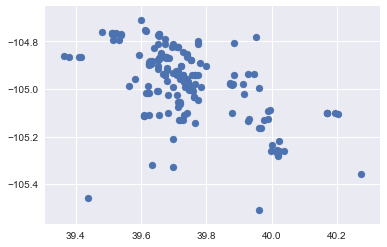

In [514]:
plt.scatter([x[2] for x in cuisine_loc], [y[3] for y in cuisine_loc])

In [515]:
conn.close()

In [516]:
cuisine_df = pd.DataFrame(cuisine_loc)
cuisine_df.head(10)

,0,1,2,3
0,417160305,mexican,39.993854,-105.090133
1,442621224,steak_house,39.754424,-104.997301
2,442771785,brazilian,39.751221,-105.002115
3,564844862,asian,39.998746,-105.261580
4,565305451,coffee_shop,39.772497,-104.797182
5,566510042,bagels,39.626042,-104.883302
6,581209957,mexican,39.745418,-104.991626
7,598415402,pizza,39.622324,-104.987544
8,636435516,chinese,39.622768,-105.108666
9,637835669,american,39.739854,-104.967930


In [517]:
cuisine_df['value'] = cuisine_df[1]

In [518]:
del cuisine_df[1]
del cuisine_df[2]
del cuisine_df[3]
cuisine_df['id'] = cuisine_df[0]
del cuisine_df[0]

In [519]:
cuisine_df.head()

,value,id
0,mexican,417160305
1,steak_house,442621224
2,brazilian,442771785
3,asian,564844862
4,coffee_shop,565305451


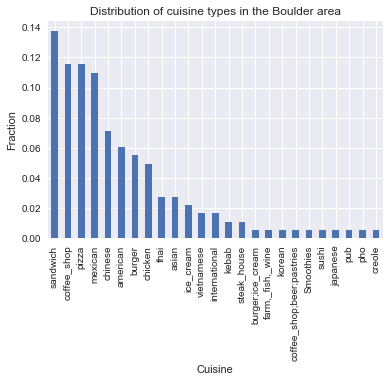

In [520]:
cuisine_df['value'].value_counts(normalize=True).head(25).plot(kind='bar')
plt.title("Distribution of cuisine types in the Boulder area")
plt.xlabel("Cuisine")
plt.ylabel("Fraction")

References: 
    
 1)   https://discussions.udacity.com/t/creating-db-file-from-csv-files-with-non-ascii-unicode-characters/174958/2
 
 2) https://gist.github.com/swwelch/f1144229848b407e0a5d13fcb7fbbd6f
 
 3)

In [521]:
contributions_df = pd.DataFrame(contributions)
contributions_df.head(10)

,0,1
0,chachafish,106197
1,Your Village Maps,81889
2,woodpeck_fixbot,33807
3,jjyach,32340
4,GPS_dr,30780
5,DavidJDBA,18505
6,Stevestr,17026
7,CornCO,16279
8,russdeffner,12449
9,Berjoh,8401
